### Imports
https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn.utils import shuffle
from tsfresh import extract_features
from xgboost import XGBClassifier, plot_tree
%run plot.py


### Read data

# Study of CNN performance for varying dataset sizes.


In [17]:
import tensorflow.random as tf_r
from keras import regularizers, initializers


fnamex_t='test_set_X.dat'
fnamey_t='test_set_Y.dat'
x_test = np.loadtxt(fnamex_t, delimiter=" ",dtype=float)
categ_t = np.loadtxt(fnamey_t).astype(int)
n_class = 3    #  = len(np.unique(y)) #print('data: ',N)
N_t,L_t = len(x_test), len(x_test[0])
y_test = np.zeros((N_t,n_class))
for z in range(N_t):
    y_test[z][categ_t[z]] = 1.
xm_t = x_test.mean(axis=1)
for v in range(N_t):
    x_test[v] = x_test[v]-xm_t[v]
x_test = x_test/400
d = {}

for i in [20, 50, 100, 150, 200, 250, 300, 400, 500]:
    str0 = str(i)
    d["test_acc{0}".format(i)] = []
    for j in range(1,21):
        str1 = str(j)
        np.random.seed()
        str2 = 'ts_L60_Z12_A500_DX50_bias5_N10000.dat'
        fnamex='DATA/x_'+str2
        fnamey='DATA/y_'+str2
        x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
        N,L = len(x), len(x[0])
        categ = np.loadtxt(fnamey, dtype=int)
        n_class = 3    # y.argmax() - y.argmin() +1
        print('data: ',N)
        y = np.zeros((N,n_class))
        for k in range(N):
            y[k][categ[k]] = 1.
        X, Y = shuffle(x, y)
        x_snipped = X[:i]
        y_snipped = Y[:i]
        xm_snipped = x_snipped.mean(axis=1)
        for m in range(i):
            x_snipped[m] = x_snipped[m]-xm_snipped[m]
        x_snipped = x_snipped/400
        perc_train=0.8
        N_train = int(perc_train*i)
        x_train = x_snipped[:N_train]
        y_train = y_snipped[:N_train]
        x_val = x_snipped[N_train:]
        y_val = y_snipped[N_train:]
        N_val = len(x_val)
        x_train = x_train.reshape(x_train.shape[0], L, 1)
        x_val =  x_val.reshape(x_val.shape[0], L,1)
        input_shape = (L, 1)
        reg = regularizers.l2(0.02)
        ini = keras.initializers.RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
        NCONV = 1
        NF = 5
        model = Sequential()
        model.add(Conv1D(filters = NF,kernel_size = 11, kernel_initializer = ini, kernel_regularizer = reg, activation = 'relu',input_shape = input_shape))
        model.add(AveragePooling1D(5))
        model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
        model.add(Flatten())
        model.add(Dense(12, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(3, activation = 'softmax'))
        opt = tf.keras.optimizers.Adam()
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics = ['accuracy'])
        BATCH_SIZE = int(i/5)
        EPOCHS = 100
        print('---Model ', NCONV, '---\nFITTING...NUM SAMPLES = ', i, 'RUN = ', j)
        print(x_train.shape, y_train.shape)
        fit = model.fit(x_train, y_train,
        batch_size = BATCH_SIZE,
        epochs = EPOCHS,
        validation_data = (x_val, y_val),
        verbose = 0,
        shuffle = True)
        test = model.evaluate(x_test, y_test,batch_size = BATCH_SIZE,verbose = 0)
        test_accuracy = test[1]
        d["test_acc{0}".format(i)].append(test_accuracy)
        



data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  1
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  2
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  3
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  4
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  5
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  6
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  7
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  8
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  9
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  10
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  20 RUN =  11
(16, 60, 1) (16, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =

data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  200 RUN =  15
(160, 60, 1) (160, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  200 RUN =  16
(160, 60, 1) (160, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  200 RUN =  17
(160, 60, 1) (160, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  200 RUN =  18
(160, 60, 1) (160, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  200 RUN =  19
(160, 60, 1) (160, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  200 RUN =  20
(160, 60, 1) (160, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  250 RUN =  1
(200, 60, 1) (200, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  250 RUN =  2
(200, 60, 1) (200, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  250 RUN =  3
(200, 60, 1) (200, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  250 RUN =  4
(200, 60, 1) (200, 3)
data:  10000
---Model  1 ---
FITTING...NUM SAMPLES =  250 RUN =  5
(200, 60, 1) (200, 3)
data:  10000
--

In [18]:
print(d)


{'test_acc20': [0.746666669845581, 0.07999999821186066, 0.0, 0.4099999964237213, 0.6200000047683716, 0.20999999344348907, 0.5566666722297668, 0.6566666960716248, 0.18333333730697632, 0.23000000417232513, 0.36666667461395264, 0.4233333468437195, 0.15333333611488342, 0.3199999928474426, 0.35333332419395447, 0.5433333516120911, 0.4699999988079071, 0.36666667461395264, 0.43666666746139526, 0.596666693687439], 'test_acc50': [0.6033333539962769, 0.4533333480358124, 0.33000001311302185, 0.3333333432674408, 0.4866666793823242, 0.2866666615009308, 0.25333333015441895, 0.4833333194255829, 0.1966666728258133, 0.3799999952316284, 0.17666666209697723, 0.30666667222976685, 0.046666666865348816, 0.273333340883255, 0.46000000834465027, 0.3700000047683716, 0.3499999940395355, 0.47333332896232605, 0.43666666746139526, 0.1899999976158142], 'test_acc100': [0.18333333730697632, 0.38333332538604736, 0.09333333373069763, 0.3799999952316284, 0.25333333015441895, 0.4099999964237213, 0.3700000047683716, 0.30000

[0.3861666716635227, 0.3445000030100346, 0.3020000010728836, 0.30750000290572643, 0.32383333183825014, 0.3403333343565464, 0.37383333295583726, 0.3399999991059303, 0.3521666631102562]
[0.19586638533217535, 0.13034260675944953, 0.08888444482032233, 0.11533465749596711, 0.06186252549911905, 0.061733296566845994, 0.04124823149998657, 0.03356585413998506, 0.022491359218735588]


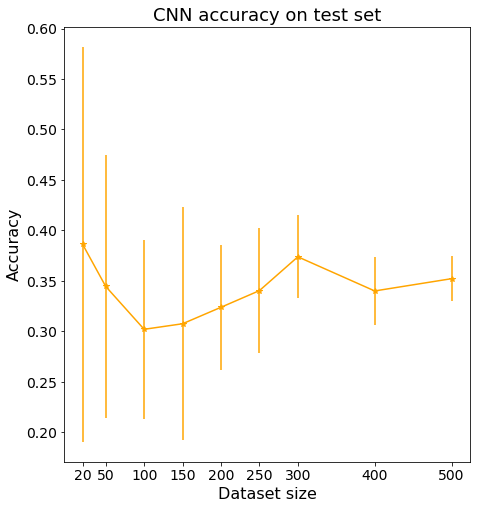

In [19]:
accuracies = []
stds = []
for i in [20, 50, 100, 150, 200, 250, 300, 400, 500]:
    accuracies.append(np.mean(d["test_acc{0}".format(i)]))
    stds.append(np.std(d["test_acc{0}".format(i)]))
    
print(accuracies)
print(stds)

N_samples = [20, 50, 100, 150, 200, 250, 300, 400, 500]

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax1.set_title('CNN accuracy on test set', fontsize = 18)
ax1.set_xlabel('Dataset size', size = 16)
ax1.set_ylabel('Accuracy',size = 16)
plt.xticks(N_samples)
ax1.errorbar(N_samples, accuracies, yerr = stds, fmt='*', color = 'orange', label = 'error bars', ls = '-')
plt.show()


In [20]:
print(accuracies)
print(stds)
np.savetxt('accuracies_on_test_set.dat', accuracies)
np.savetxt('std_of_accuracies_on_test_set.dat', stds)


[0.3861666716635227, 0.3445000030100346, 0.3020000010728836, 0.30750000290572643, 0.32383333183825014, 0.3403333343565464, 0.37383333295583726, 0.3399999991059303, 0.3521666631102562]
[0.19586638533217535, 0.13034260675944953, 0.08888444482032233, 0.11533465749596711, 0.06186252549911905, 0.061733296566845994, 0.04124823149998657, 0.03356585413998506, 0.022491359218735588]


# Study of XGBoost performance
doesn't work 

In [15]:
def get_df(x):
    #N = #samples, t = timesteps
    N, t = x.shape[0], x.shape[1]
    #build id columns
    id_col = np.repeat(np.arange(N),t)
    #build time columns
    time_col = np.tile(np.arange(t),N)
    #build var columns
    x_col = x.flatten()
      
    #build dict for df
    x_dict = {'id':id_col,'time':time_col,'value':x_col}
        
    #return dataframe
    return pd.DataFrame(x_dict)

In [27]:
from sklearn.metrics import accuracy_score
import pandas as pd


fnamex_t='test_set_X.dat'
fnamey_t='test_set_Y.dat'
x_test = np.loadtxt(fnamex, delimiter=" ",dtype=float)
categ_t = np.loadtxt(fnamey).astype(int)
n_class = 3    #  = len(np.unique(y)) #print('data: ',N)
y_test = np.zeros((N,n_class))
for k in range(N):
    y_test[k][categ[k]] = 1.
xm_t = x_test.mean(axis=1)
for m in range(N):
    x_test[m] = x_test[m]-xm_t[m]
x_test = x_test/400



e = {}


for i in [20, 50, 100, 150, 200, 250, 300, 400, 500]:
    str0 = str(i)
    e["test_acc{0}".format(i)] = []
    for j in range(1,21):
        str1 = str(j)
        fnamex='data_gen_'+str0+'_samples_X_'+str1+'.dat'
        fnamey='data_gen_'+str0+'_samples_Y_'+str1+'.dat'
        x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
        N,L = len(x), len(x[0])
        categ = np.loadtxt(fnamey).astype(int)
        n_class = 3    #  = len(np.unique(y)) #print('data: ',N)
        y = np.zeros((N,n_class))
        df = get_df(x) 
        x_features = extract_features(
                            df, #our dataframe
                            column_id='id', #sample id, from 0 to N
                            column_sort='time', #timestep, from 0 to t
                            column_kind=None, #we have only one feature
                            column_value='value', #value of input 
                            n_jobs=4) #number of cores
        perc_train=0.8
        N_train = int(perc_train*i)
        x_train = x_features[:N_train]
        y_train = y[:N_train]
        x_val = x_features[N_train:]
        y_val = y[N_train:]
        N_val = len(x_val)
        print('N_train=',N_train,'  N_val=',N_val,'  n_class=',n_class)
        if True:
            average = np.mean(x_train,axis=0)
            x_train -= average
            x_val -= average
            std = np.std(x_train,axis=0)
            x_train /= std
            x_val /= std    
        np.random.seed(12345)
        params = {'max_depth':6,'min_child_weight':1,\
          'learning_rate':0.3,'use_label_encoder':False}
        #build model with given params
        model_xgboost = XGBClassifier(**params)
        #fit
        model_xgboost.fit(x_train.values,y_train)
        y_pred_test = model.predict(x_test)
        test_accuracy= accuracy_score(y_test,y_pred_test)
        e["test_acc{0}".format(i)].append(test_accuracy)


Feature Extraction: 100%|██████████| 20/20 [00:00<00:00, 22.15it/s]

N_train= 16   N_val= 4   n_class= 3


ValueError: Invalid shape: (16, 3) for label

In [24]:
print(e)



{'test_acc20': []}
